# Script Contents:

#### 1. PII Data (Pesonally Identifiable Information)

#### 2. Geographical Segmentation

#### 3. Identifying Low-active Customers

#### 4. Customer Profiling

#### 5. Aggregate MAX, MEAN, & MIN of Customer Profiles

#### 6. Compare Customer Profiles with Regiond & Departments

#### 7. Additional Analysis

In [89]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [90]:
# Import dataset

path = r'C:\Users\X1\Instacart Basket Analysis Master'
df = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'orders_products_customer_merged.pkl'))

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434212 entries, 0 to 32434211
Data columns (total 32 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 object  
 1   first_name              object  
 2   last_name               object  
 3   gender                  object  
 4   state                   object  
 5   age                     int64   
 6   date_joined             object  
 7   children                int64   
 8   fam_status              object  
 9   income                  int64   
 10  order_id                int64   
 11  order_number            int64   
 12  orders_day_of_week      int64   
 13  order_hour_of_day       int64   
 14  days_since_prior_order  float64 
 15  product_id              int64   
 16  add_to_cart_order       int64   
 17  reordered               int64   
 18  product_name            object  
 19  aisle_id                int64   
 20  department_id           int64   
 21  prices

In [92]:
df.head()

,user_id,first_name,last_name,gender,state,age,date_joined,children,fam_status,income,...,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price_spent,spending_flag,median_days,frequent_customer_flag,merge_indicator
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


# 1. Consider any security implications that might exist for this new data.

##### - The Instacart Data Set and Data Dictionary used were from Kaggle “The Instacart Online Grocery Shopping Dataset 2017”, Accessed from www.instacart.com/datasets/grocery-shopping-201 on March 2024.

##### - The Customers Data Set, which contains users' names, age, income, etc., were created by CareerFoundry for learning purposes only.  If our analysis is used publicly, customer names can be replaced by using the user ID instead for privacy.

# 2. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. 

#### Northeast Region

In [93]:
# Create new 'region' column

northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

In [94]:
# Use loc to create region

df.loc[df['state'].isin(northeast),'regions']= 'Northeast' 

#### Midwest Region

In [95]:
# Create new 'region' column

midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']

In [96]:
# Use loc to create region

df.loc[df['state'].isin(midwest),'regions']= 'Midwest' 

#### South Region

In [97]:
# Create new 'region' column

south = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [98]:
# Use loc to create region

df.loc[df['state'].isin(south),'regions']= 'South' 

#### West Region

In [99]:
# Create new 'region' column

west = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [100]:
# Use loc to create region

df.loc[df['state'].isin(west),'regions']= 'West' 

In [101]:
# Frequency check

df['regions'].value_counts(dropna = False)

regions
South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: count, dtype: int64

In [102]:
# Check multiple columns

df[['regions', 'state']].tail(20)

,regions,state
32434192,West,California
32434193,West,California
32434194,West,California
32434195,West,California
32434196,West,California
32434197,Northeast,New York
32434198,Northeast,New York
32434199,Northeast,New York
32434200,Northeast,New York
32434201,Northeast,New York


## Determine spending habits between regions.

In [103]:
# Cross check region and spending_flag

spending_by_region = pd.crosstab(df['regions'], df['spending_flag'], dropna = False)
spending_by_region

spending_flag,High spender,Low spender
regions,,
Midwest,156129,7447681
Northeast,108343,5620004
South,210182,10591428
West,160807,8139638


#### - The South Region spends more than any other region. Considering the amount of High/Low Spenders, there are about 50 times more Low Spenders than High Spenders.

# 3. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [104]:
# Define minium number of orders

min_order = 5

# Create flag 

df['Exclude'] = df['max_order'] < min_order

In [105]:
# Filter out low-activity customers

active_customers = df.loc[df['Exclude'] == False]

In [106]:
active_customers.tail()

,user_id,first_name,last_name,gender,state,age,date_joined,children,fam_status,income,...,busiest_period_of_day,max_order,loyalty_flag,mean_price_spent,spending_flag,median_days,frequent_customer_flag,merge_indicator,regions,Exclude
32434166,135902,Doris,Richmond,Female,Missouri,66,4/1/2020,2,married,53374,...,Average orders,8,New customer,6.960345,Low spender,8.0,Frequent customer,both,Midwest,False
32434167,135902,Doris,Richmond,Female,Missouri,66,4/1/2020,2,married,53374,...,Most orders,8,New customer,6.960345,Low spender,8.0,Frequent customer,both,Midwest,False
32434168,135902,Doris,Richmond,Female,Missouri,66,4/1/2020,2,married,53374,...,Most orders,8,New customer,6.960345,Low spender,8.0,Frequent customer,both,Midwest,False
32434169,135902,Doris,Richmond,Female,Missouri,66,4/1/2020,2,married,53374,...,Average orders,8,New customer,6.960345,Low spender,8.0,Frequent customer,both,Midwest,False
32434170,135902,Doris,Richmond,Female,Missouri,66,4/1/2020,2,married,53374,...,Most orders,8,New customer,6.960345,Low spender,8.0,Frequent customer,both,Midwest,False


In [107]:
active_customers.shape

(30992664, 34)

In [108]:
df.shape

(32434212, 34)

In [109]:
32434212-30992664

1441548

In [110]:
active_customers['max_order'].describe()

count    3.099266e+07
mean     3.442563e+01
std      2.489426e+01
min      5.000000e+00
25%      1.400000e+01
50%      2.800000e+01
75%      4.800000e+01
max      9.900000e+01
Name: max_order, dtype: float64

#### - With the minimum orders being 5, this dataframe excludes customers who only made 4 or less orders total.  A total of 1,441,548 observations were removed.

In [111]:
# Export active_customers df

active_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'active_customers.pkl'))

# 4. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

## Age Profile

In [112]:
# Define age groups of users, create flag
# Assuming users must legally be 18 or older to create an Instacart account:

df.loc[df['age'] < 21, 'age_group'] = 'Young Adult (<21)'

In [113]:
df.loc[(df['age'] >= 21) & (df['age'] < 40), 'age_group'] = 'Adult (21-39)' 

In [114]:
df.loc[(df['age'] >= 40) & (df['age'] < 65), 'age_group'] = 'Middle Aged (40-64)' 

In [115]:
df.loc[df['age'] >= 65, 'age_group'] = 'Senior (65+)'

In [116]:
# Frequency Check

df['age_group'].value_counts(dropna = False)

age_group
Middle Aged (40-64)    12677418
Adult (21-39)           9649793
Senior (65+)            8582637
Young Adult (<21)       1524364
Name: count, dtype: int64

In [117]:
# Convert age_group into percentage

age_group_percent = (df['age_group'].value_counts(normalize=True) * 100).sort_index()
age_group_percent

age_group
Adult (21-39)          29.751896
Middle Aged (40-64)    39.086561
Senior (65+)           26.461679
Young Adult (<21)       4.699864
Name: proportion, dtype: float64

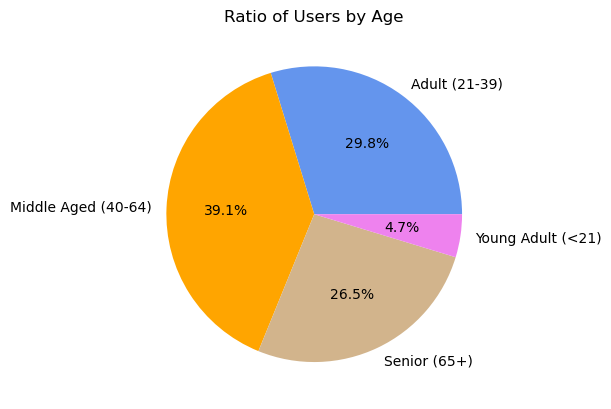

In [118]:
# Pie Chart of Age Groups

age_group_pie = plt.pie(age_group_percent, labels = age_group_percent.index, autopct='%1.1f%%', colors=['cornflowerblue', 'orange', 'tan', 'violet'])
plt.title('Ratio of Users by Age')

# Export viz

output_path = os.path.join(path, '04 Analysis','Visualizations', 'pie_age_group.png')
plt.savefig(output_path)

## Income Profile

In [119]:
# Define income status

df.loc[df['income'] <= 50000, 'income_profile'] = 'Low Income'

In [120]:
df.loc[(df['income'] > 50000) & (df['income'] <= 99999), 'income_profile'] = 'Middle Income'

In [121]:
df.loc[df['income'] >= 100000, 'income_profile'] = 'High Income'

In [122]:
# Frequency Check

df['income_profile'].value_counts(dropna = False)

income_profile
High Income      14827337
Middle Income    14009004
Low Income        3597871
Name: count, dtype: int64

In [123]:
# Frequency of family status & income

family_income_status = pd.crosstab(df['income_profile'], df['fam_status'], dropna = False)
family_income_status

fam_status,divorced/widowed,living with parents and siblings,married,single
income_profile,,,,
High Income,1929691,49024,11054836,1793786
Low Income,226906,235753,2457229,677983
Middle Income,617831,1267325,9264848,2859000


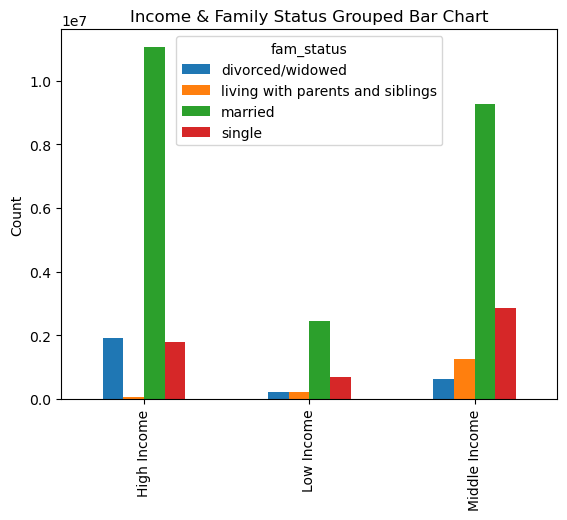

In [124]:
# Get value counts for bar chart
bar_fam_income = df.groupby(['income_profile', 'fam_status']).size().unstack(fill_value=0)

# Create grouped bar chart

fig, ax = plt.subplots()
bar_fam_income.plot(kind='bar', ax=ax)

# Customize

ax.set_xlabel('')
ax.set_ylabel('Count')
ax.set_title('Income & Family Status Grouped Bar Chart')

# Export viz

output_path = os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_income.png')
plt.savefig(output_path)

#### - Our largest demographic consists of users who are married who are considered high income.

## Department Profile

In [125]:
# Convert department_id into their respective names

department_mapping = {
    1: "frozen",
    2: "other",
    3: "bakery",
    4: "produce",
    5: "alcohol",
    6: "international",
    7: "beverages",
    8: "pets",
    9: "dry goods pasta",
    10: "bulk",
    11: "personal care",
    12: "meat seafood",
    13: "pantry",
    14: "breakfast",
    15: "canned goods",
    16: "dairy eggs",
    17: "household",
    18: "babies",
    19: "snacks",
    20: "deli",
}

# Create new column

df['department_name'] = df['department_id'].map(department_mapping).fillna('missing')

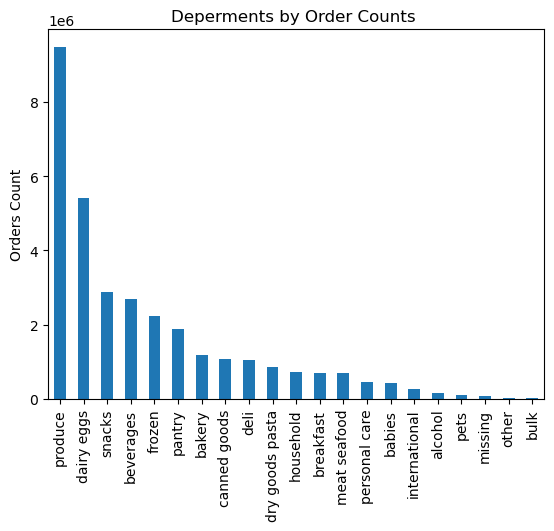

In [126]:
# Create bar chart 

bar_dept_orders = df['department_name'].value_counts().plot.bar()
plt.title('Deperments by Order Counts ')
plt.xlabel('')
plt.ylabel('Orders Count')

# Export bar chart

bar_dept_orders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_orders.png'))

#### - The top 5 most ordered departments are Produce, Dairy Eggs, Snacks, Beverages, Frozen.
#### - The bottom 5 are Bulk, Other, Missing, Pets, Alcohol.
#### - I suggest advertising Snacks combined with Bulk for users with families.  Similarly, Beverages and Alcohol should be paired together.

## Number of Dependants Profile

In [127]:
# Frequency check of dependents

df['children'].value_counts(dropna = False)

children
3    8142318
0    8105197
2    8098387
1    8088310
Name: count, dtype: int64

In [128]:
# Cross tab of age_group & dependents

age_dependents = pd.crosstab(df['age_group'], df['children'], dropna = False)
age_dependents

children,0,1,2,3
age_group,,,,
Adult (21-39),2422159,2389076,2423176,2415382
Middle Aged (40-64),3198758,3175350,3111403,3191907
Senior (65+),2122132,2125541,2189041,2145923
Young Adult (<21),362148,398343,374767,389106


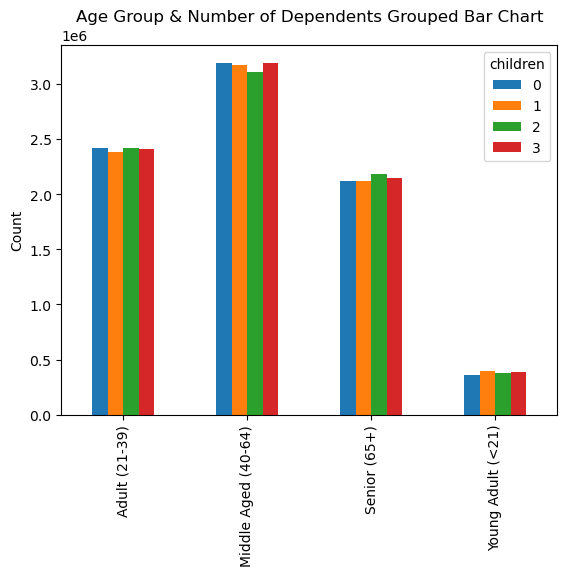

In [129]:
# Get value counts for bar chart
bar_age_dependents = df.groupby(['age_group', 'children']).size().unstack(fill_value=0)

# Create grouped bar chart

fig, ax = plt.subplots()
bar_age_dependents.plot(kind='bar', ax=ax)

# Customize

ax.set_xlabel('')
ax.set_ylabel('Count')
ax.set_title('Age Group & Number of Dependents Grouped Bar Chart')

# Export viz

output_path = os.path.join(path, '04 Analysis','Visualizations', 'bar_age_dependents.png')
plt.savefig(output_path)

#### - Interestingly, all age groups have similar sized families whether they have 3 children or zero.  Again, the Adult age group make up majority of users.  We should promote items that cater to their family needs, like produce and snacks.

## Analyze orders_day_of_week

In [130]:
# Convert orders_day_of_week into their respective names

days_of_week_mapping = {
    0: "Saturday",
    1: "Sunday",
    2: "Monday",
    3: "Tuesday",
    4: "Wednesday",
    5: "Thursday",
    6: "Friday",
}

# Create new column

df['orders_day_of_week2'] = df['orders_day_of_week'].map(days_of_week_mapping).fillna('missing')

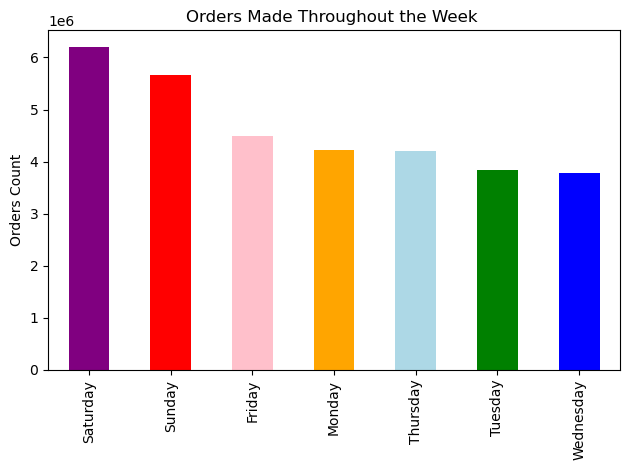

In [131]:
# Create bar chart using ordrs_day_of_week column

bar_orders_dow = df['orders_day_of_week2'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'lightblue', 'green', 'blue'])
plt.title('Orders Made Throughout the Week ')
plt.xlabel('')
plt.ylabel('Orders Count')
plt.tight_layout()

# Export bar chart

bar_orders_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_day_of_week.png'))

#### - This bar graph shows which days of the week has most and least amount of orders on Instacart. Majority of orders are placed at the beginning and the end of the week.

## Analyze order_hour_of_day

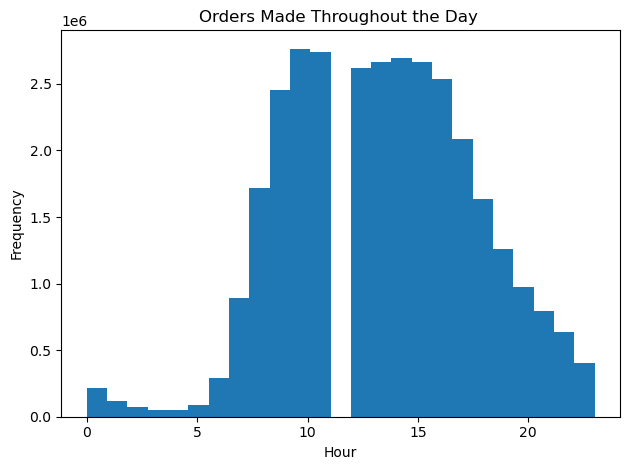

In [132]:
# Create histogram of 'order_hour_of_day'

hist_order = df['order_hour_of_day'].plot.hist(bins = 25)
plt.title('Orders Made Throughout the Day ')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.tight_layout()

# Export histogram

hist_order.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order.png'))

In [133]:
# Check for missing values

df['order_hour_of_day'].value_counts(dropna = False)

order_hour_of_day
10    2764390
11    2738585
14    2691563
15    2664522
13    2663272
12    2620800
16    2537469
9     2456661
17    2089452
8     1719952
18    1637922
19    1259382
20     977017
7      891928
21     796362
22     634737
23     402612
6      290770
0      218942
1      115786
5       88057
2       69431
4       53283
3       51317
Name: count, dtype: int64

#### - The peak time of orders are made starting around 10 AM and slowly decrease as the day goes on. However, it is odd that there is a blank space around 11-12 PM, implying that no orders are being placed at all.  Since there is no missing data, it'd be best to check with the stakeholders to further investigate.

# 5. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [134]:
# Check frequency of age_group & days_since_prior_order

usage_freq1 = df.groupby('age_group').agg(({'days_since_prior_order': ['mean', 'min', 'std', 'max']}))
usage_freq1

days_since_prior_order                     
                                      mean  min       std   max
age_group                                                      
Adult (21-39)                    11.098938  0.0  8.752963  30.0
Middle Aged (40-64)              11.117828  0.0  8.797748  30.0
Senior (65+)                     11.079006  0.0  8.771372  30.0
Young Adult (<21)                11.165224  0.0  8.828628  30.0

In [135]:
# Update prices column, we learned from the previous exercise that some items are priced at 99,999 dollars
# Change values over 100 dollars into Missing Values
# Replace outliers with NaNs

df.loc[df['prices'] >100, 'prices'] = np.nan

# Check if change was successful

df['prices'].max()

25.0

In [136]:
# Check frequency of income_profile & prices

usage_freq2 = df.groupby('income_profile').agg(({'prices': ['mean', 'min', 'std', 'max']}))
usage_freq2

prices                     
                    mean  min       std   max
income_profile                               
High Income     7.963629  1.0  4.259566  25.0
Low Income      6.702746  1.0  3.987252  25.0
Middle Income   7.898730  1.0  4.248563  25.0

# 6. Compare customer profiles with regions and departments. 

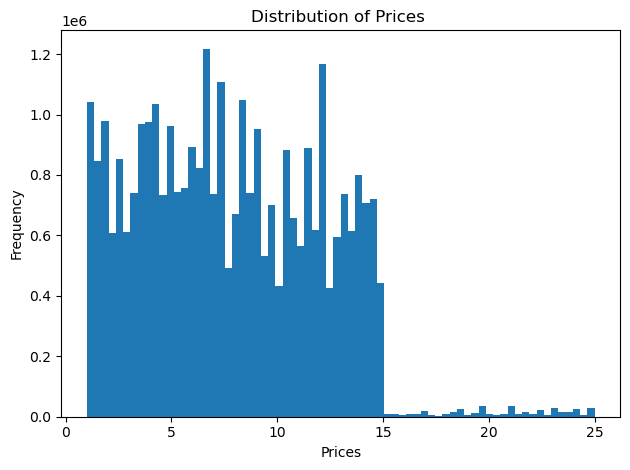

In [137]:
# Histogram of 'prices' column

hist_prices = df['prices'].plot.hist(bins = 70)
plt.title('Distribution of Prices ')
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.tight_layout()

# Export histogram

hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_prices.png'))

#### - This is a histogram of the prices column.  Most products sold are priced between 1 - 15 dollars, while few items are sold around 15 - 25 dollars.  In short, majority of our sales are from items sold at 15 dollars or less.

In [138]:
# Cross check region and spending_flag

spending_by_region = pd.crosstab(df['regions'], df['spending_flag'], dropna = False)
spending_by_region

spending_flag,High spender,Low spender
regions,,
Midwest,156129,7447681
Northeast,108343,5620004
South,210182,10591428
West,160807,8139638


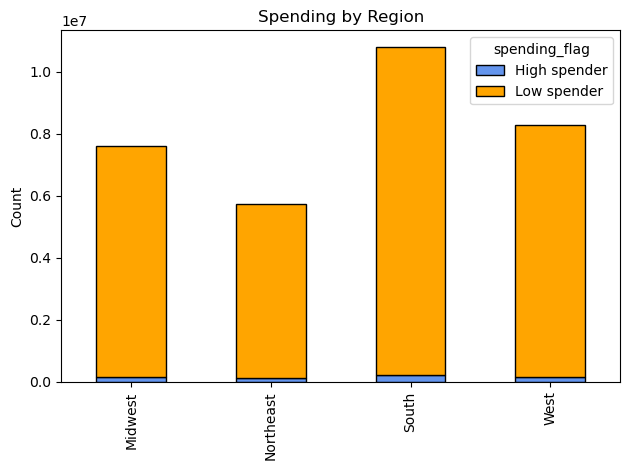

In [139]:
# Create stacked bar chart

colors = ['cornflowerblue', 'orange']
bar_regions_spender2 = spending_by_region.plot(kind='bar', stacked=True, edgecolor = 'black', color = colors)
plt.title('Spending by Region')
plt.xlabel('')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Saving as PNG
bar_regions_spender2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_regions_spender2 .png'))

#### - This chart shows how much each region spends and the difference between high & low spenders.  
#### - In a previous exercise, we defined spenders buy finding their total price spent and taking the mean number.
#### - High spenders are users with a mean price spent that is greater than or equal to 10.
#### - Low spenders are users with a mean price spent that is less than 10.
#### - We can conclude that the South Region buys the most on Instacart out of all regions and about 90 percent of users are low spenders.

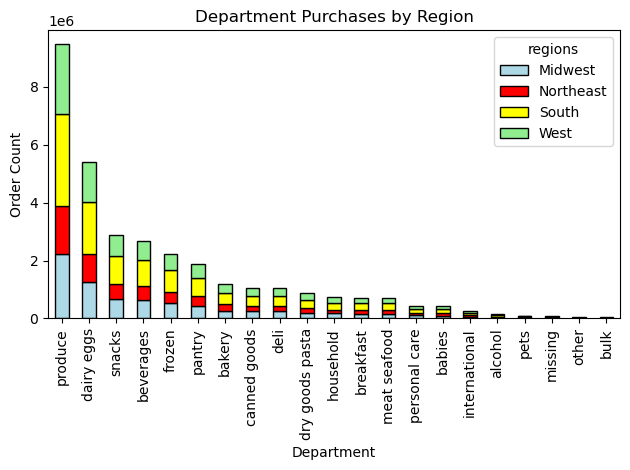

In [140]:
# Grouping department_name and region

dept_region = df.groupby(['department_name', 'regions']).size().unstack()

# Sort values large to small
dept_region = dept_region.sort_values(by = 'West', ascending = False)

# Creating bar chart
colors = ['lightblue', 'red', 'yellow','lightgreen']
bar_dept_region = dept_region.plot(kind='bar', stacked=True, edgecolor = 'black', color = colors)
plt.title('Department Purchases by Region')
plt.xlabel('Department')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

# Saving as PNG
bar_dept_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_region .png'))

#### - This stacked bar chart displays what each reagions orders from each department.  As stated earlier, the South is heavily dominant in all departments, followed by the West.

# 7. Additional Analysis

In [141]:
# Create new column for simpler price range

df.loc[(df['prices']) <= 5, 'prod_price_range'] = '$5 or less'

In [142]:
df.loc[(df['prices'] > 5) & (df['prices'] <= 10), 'prod_price_range'] = '$6 - $10'

In [143]:
df.loc[(df['prices'] > 10) & (df['prices'] <= 15), 'prod_price_range'] = '$11 - $15'

In [144]:
df.loc[(df['prices']) > 15 , 'prod_price_range'] = '$16 & up'

In [145]:
df['prod_price_range'].value_counts(dropna = False)

prod_price_range
$6 - $10      11763581
$11 - $15     10126565
$5 or less    10126384
$16 & up        412555
nan               5127
Name: count, dtype: int64

In [146]:
# Cross check multiple columns with .head()

df[['product_name', 'prices', 'prod_price_range']].head(10)

,product_name,prices,prod_price_range
0,Soda,9.0,$6 - $10
1,Soda,9.0,$6 - $10
2,Soda,9.0,$6 - $10
3,0% Greek Strained Yogurt,12.6,$11 - $15
4,0% Greek Strained Yogurt,12.6,$11 - $15
5,0% Greek Strained Yogurt,12.6,$11 - $15
6,0% Greek Strained Yogurt,12.6,$11 - $15
7,0% Greek Strained Yogurt,12.6,$11 - $15
8,0% Greek Strained Yogurt,12.6,$11 - $15
9,Clementines,4.3,$5 or less


In [147]:
# Check stats of loyalty_flag & days_since_prior_order

usage_freq3 = df.groupby('loyalty_flag').agg(({'days_since_prior_order': ['mean', 'min', 'std', 'max']}))
usage_freq3

days_since_prior_order                      
                                   mean  min        std   max
loyalty_flag                                                 
Loyal customer                 6.026927  0.0   4.561078  30.0
New customer                  17.977110  0.0  10.131070  30.0
Regular customer              12.155304  0.0   8.456092  30.0

In [148]:
df['total_spent'] = df.groupby(['user_id'])['prices'].transform(np.sum)

C:\Users\X1\AppData\Local\Temp\ipykernel_19920\378763140.py:1: FutureWarning: The provided callable <function sum at 0x000001FD6E8E8540> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df['total_spent'] = df.groupby(['user_id'])['prices'].transform(np.sum)


In [149]:
# Check columns

df[['first_name', 'user_id', 'total_spent']].head(10)

,first_name,user_id,total_spent
0,Deborah,26711,143.8
1,Deborah,26711,143.8
2,Deborah,26711,143.8
3,Deborah,26711,143.8
4,Deborah,26711,143.8
5,Deborah,26711,143.8
6,Deborah,26711,143.8
7,Deborah,26711,143.8
8,Deborah,26711,143.8
9,Deborah,26711,143.8


In [150]:
# Analyze loyalty_flag & days_since_prior_order

usage_freq4 = df.groupby('loyalty_flag').agg(({'total_spent': ['mean', 'min', 'std', 'max']}))
usage_freq4

total_spent                             
                         mean    min          std      max
loyalty_flag                                              
Loyal customer    6162.800522  156.0  3142.506865  26651.1
New customer       690.924500    3.0   447.178475   3920.4
Regular customer  2446.791137   15.7  1545.585100  12186.6

In [151]:
# Analyze fam_status & ordering habits

age_fam_status = pd.crosstab(df['age_group'], df['fam_status'], dropna = False)
age_fam_status

fam_status,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
Adult (21-39),0,389886,6837748,2422159
Middle Aged (40-64),652296,0,9478660,2546462
Senior (65+),2122132,0,6460505,0
Young Adult (<21),0,1162216,0,362148


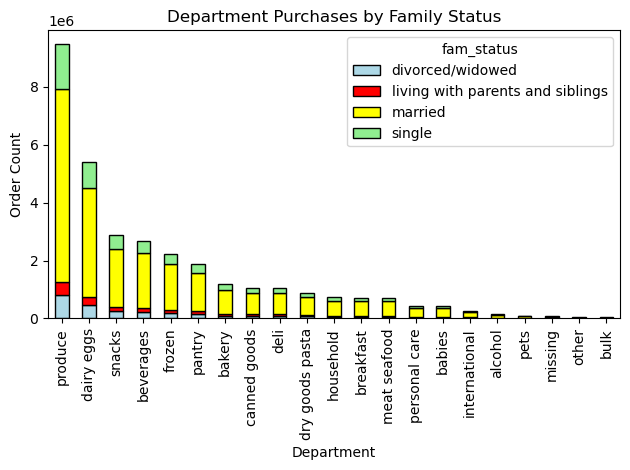

In [152]:
# Grouping department_name and fam_status

bar_dept_fam_status = df.groupby(['department_name', 'fam_status']).size().unstack()

# Sort values large to small
bar_dept_fam_status = bar_dept_fam_status.sort_values(by = ['single'], ascending = False)

# Creating bar chart
colors = ['lightblue', 'red', 'yellow','lightgreen']
bar_dept_fam_status = bar_dept_fam_status.plot(kind='bar', stacked=True, edgecolor = 'black', color = colors)
plt.title('Department Purchases by Family Status')
plt.xlabel('Department')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

# Saving as PNG
bar_dept_fam_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_fam_status .png'))

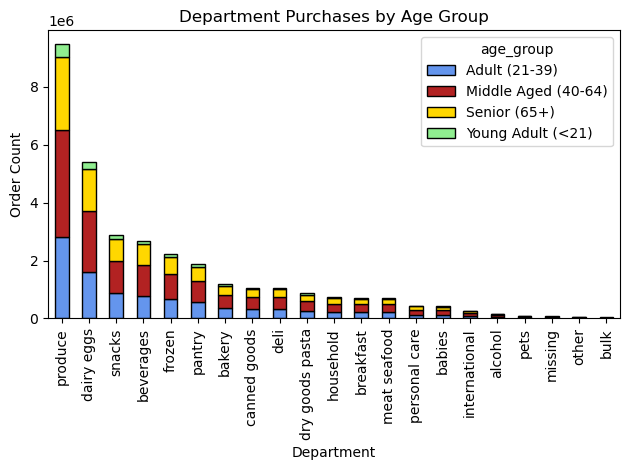

In [153]:
# Analyze age and ordering habits

bar_dept_age = df.groupby(['department_name', 'age_group']).size().unstack()

# Sort values large to small
bar_dept_age = bar_dept_age.sort_values(by = ['Middle Aged (40-64)'], ascending = False)

# Creating bar chart
colors = ['cornflowerblue', 'firebrick', 'gold','lightgreen']
bar_dept_age = bar_dept_age.plot(kind='bar', stacked=True, edgecolor = 'black', color = colors)
plt.title('Department Purchases by Age Group')
plt.xlabel('Department')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

# Saving as PNG
bar_dept_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_age .png'))

In [154]:
# Frequency of age_group & days_since_prior_order

usage_freq4 = df.groupby('age_group').agg(({'days_since_prior_order': ['mean', 'min', 'std', 'max']}))
usage_freq4

days_since_prior_order                     
                                      mean  min       std   max
age_group                                                      
Adult (21-39)                    11.098938  0.0  8.752963  30.0
Middle Aged (40-64)              11.117828  0.0  8.797748  30.0
Senior (65+)                     11.079006  0.0  8.771372  30.0
Young Adult (<21)                11.165224  0.0  8.828628  30.0

In [155]:
# Frequency of fam_status & days_since_prior_order

usage_freq4 = df.groupby('fam_status').agg(({'days_since_prior_order': ['mean', 'min', 'std', 'max']}))
usage_freq4

days_since_prior_order                     
                                                   mean  min       std   max
fam_status                                                                  
divorced/widowed                              11.047967  0.0  8.786195  30.0
living with parents and siblings              11.047919  0.0  8.764030  30.0
married                                       11.116379  0.0  8.780993  30.0
single                                        11.097592  0.0  8.770563  30.0

In [156]:
# Frequency of fam_status & total_spent

usage_freq5 = df.groupby('fam_status').agg(({'total_spent': ['mean', 'min', 'std', 'max']}))
usage_freq5

total_spent                           
                                         mean  min          std      max
fam_status                                                              
divorced/widowed                  3325.605158  3.6  3042.040176  24319.3
living with parents and siblings  3326.937607  3.9  2850.399708  16048.1
married                           3281.376078  3.0  2934.985581  26651.1
single                            3284.374220  3.0  2900.185482  20315.1

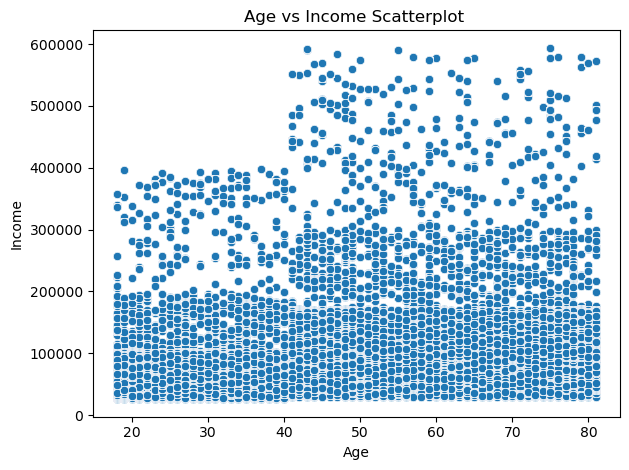

In [157]:
# Age & income scatter plot

scatter_income_age = sns.scatterplot(x = 'age', y = 'income',data = df)
plt.title('Age vs Income Scatterplot ')
plt.xlabel('Age')
plt.ylabel('Income')
plt.tight_layout()

# Export scatterplot

scatter_income_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_income_age.png'))

#### - This scatterplot shows the majority of users aged 20-80 reported income between 0 & 20k. The smallest group of users with reported income between 40k & 60k are ages 40-80. We can conclude that users 40 and older have higher income than users 39 and younger.

In [158]:
# Export dataset

df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_project.pkl'))